In [1]:
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt # check this out
import seaborn as sns

%matplotlib inline

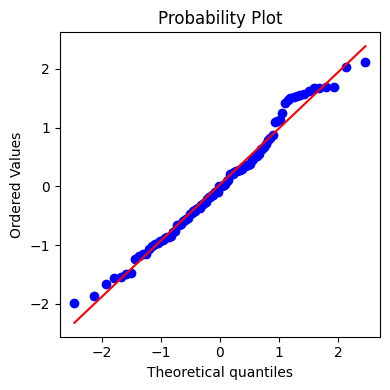

In [2]:
fig, ax = plt.subplots(figsize=(4, 4)) # QQplot

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

(array([9.300e+01, 1.251e+03, 3.305e+03, 3.272e+03, 1.224e+03, 7.220e+02,
        1.170e+02, 1.400e+01, 1.000e+00, 1.000e+00]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

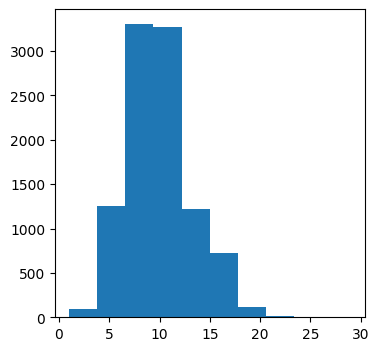

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))

p_sample = stats.poisson.rvs(10, size=10000)
plt.hist(p_sample)

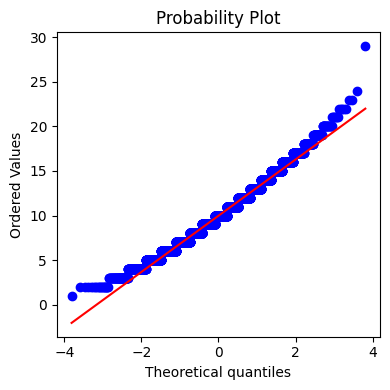

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(p_sample, plot=ax)

plt.tight_layout()
plt.show()

# Статистическая значимость, p-value

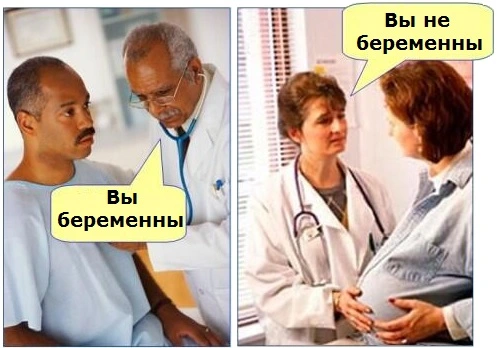

In [5]:
A = np.array([-10, 5, 10, 10, 10, 10, 20, 20, 30, 30, 30, 30, 30, 30, 40, 40, 40, 50, 60, 80])
B = np.array([-20, 10, 10, 20, 30, 30, 40, 40, 50, 50, 50, 50, 50, 50, 60, 60, 60, 60, 80, 100])
vals = np.append(A, B)
ind = np.array(['A'] * 20 + ['B'] * 20)

df = pd.DataFrame({'vals' : vals, 'box' : ind})
df.head()

,vals,box
0,-10,A
1,5,A
2,10,A
3,10,A
4,10,A


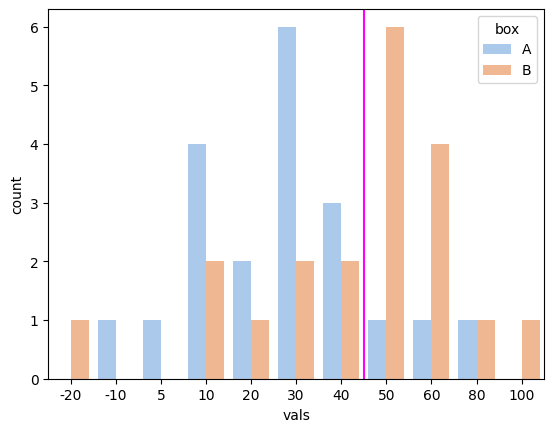

In [8]:
sns.countplot(data=df, x='vals', hue='box', palette='pastel')
plt.axvline(6.5, color='magenta') # 45

In [9]:
WEB_PAGE_DATA_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/web_page_data.csv'
FOUR_SESSIONS_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/four_sessions.csv'
CLICK_RATE_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/click_rates.csv'
IMANISHI_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/imanishi_data.csv'

In [10]:
# Повторный отбор
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time

In [13]:
session_times.Page.value_counts()

Page A    21
Page B    15
Name: Page, dtype: int64

In [14]:
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


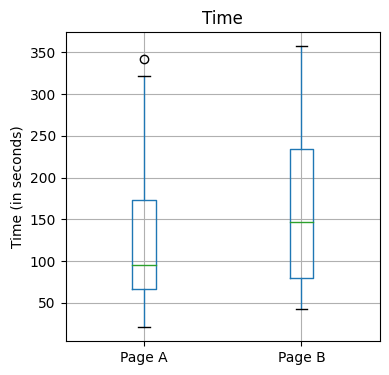

In [15]:
ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [16]:
mean_a = session_times[session_times['Page'] == 'Page A']['Time'].mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


In [17]:
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [19]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

-0.7904761904761983


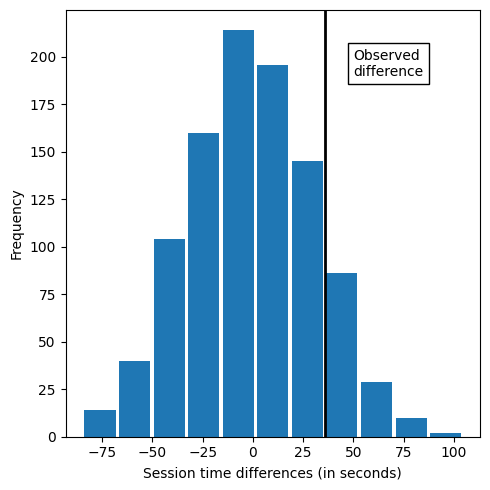

In [20]:
random.seed(42)

perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [49]:
perm_diffs = np.array(perm_diffs)
print(np.mean(perm_diffs > mean_b - mean_a))

0.127


In [14]:
session_times.shape

(36, 2)

In [53]:
#                    А      Б
#КОНВЕРСИЯ          200    182
#ВСЕГО ПОКАЗОВ    23739   22588

In [56]:
200 / 23739 * 100

0.8424954715868402

In [57]:
182 / 22588 * 100

0.8057375597662475

In [59]:
23739 + 22588 - 382

45945

Observed difference: 0.0368%


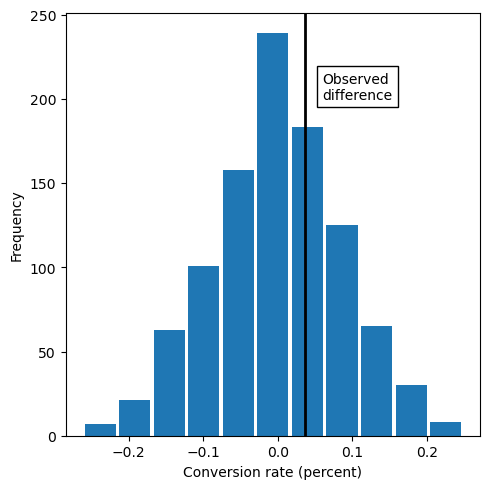

In [58]:
random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.332


H_0 -- НЕТ беременности  
H_a -- беременность ЕСТЬ

альфа -- вероятность сказать, что беременность ЕСТЬ, когда её не было  
бета -- вероятность сказать, что беременности нет, когда она была

H_0 -- беременность ЕСТЬ  
H_a -- беременности нет 

альфа -- вероятность сказать, что беременности нет, когда она была  
бета -- вероятность сказать, что беременность ЕСТЬ, когда её не было

# t-Тест

In [23]:
# ТРЕБОВАНИЕ -- НОРМАЛЬНОСТЬ
# ПРОВЕРКА НОРМАЛЬНО -- ТЕСТ ШАПИРО-УИЛКА
# 
# тест колмогорова-смирнова

In [24]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}') # 0.1

p-value for single sided test: 0.1408


In [25]:
tstat, pvalue, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time, 
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller')
print(f'p-value: {pvalue:.4f}')

p-value: 0.1408


# ANOVA

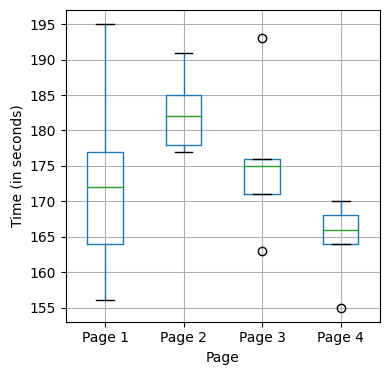

In [26]:
four_sessions = pd.read_csv(FOUR_SESSIONS_CSV)

ax = four_sessions.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

In [27]:
print(pd.read_csv(FOUR_SESSIONS_CSV).head())

     Page  Time
0  Page 1   164
1  Page 2   178
2  Page 3   175
3  Page 4   155
4  Page 1   172


In [30]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)
# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]
    
print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
8.226666666666665


Pr(Prob) 0.07733333333333334


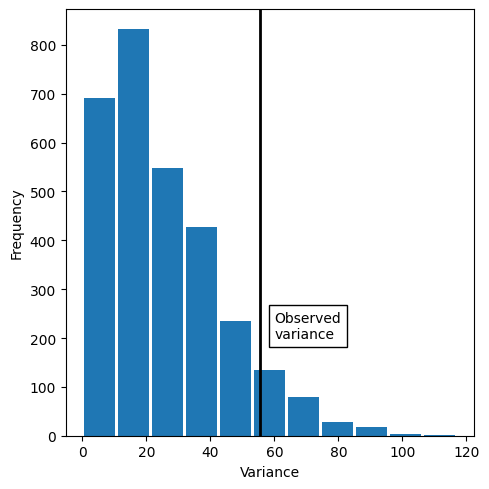

In [31]:
random.seed(42)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# шпаргалка
http://www.pubhealth.spb.ru/SAS/InBio.htm

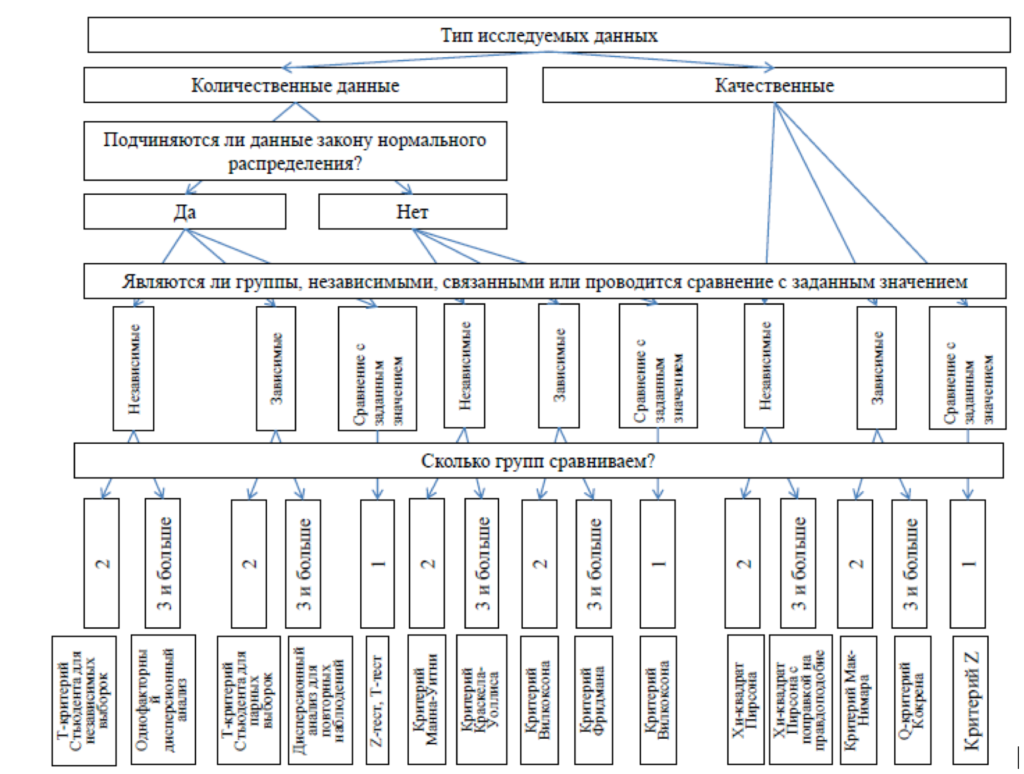